## Project Overview
This notebook analyzes **job postings** with a focus on **publication dates, salary distributions, and salary insights**.

### Key Goals:
- **Data Cleaning:** Handling missing values and normalizing key columns.
- **Salary Extraction:** Identifying and transforming salary data for analysis.
- **Visualization:** Understanding trends in job postings and salary distributions.
- **Insights:** Identifying salary patterns based on percentiles.

This structured analysis helps us explore the job market dynamics, salary expectations, and hiring trends.


## Disclaimer  

This Jupyter Notebook was developed as part of our project, with the primary focus on **data analysis and insights extraction**. Due to **time constraints**, as the **data analysis was appended just one week before the submission deadline**, some functions were written with the assistance of **ChatGPT**.  

Specifically, the following functions were **partially generated or optimized** using AI:  
- **Extracting Salary Information** (parsing and standardizing salary data)  
- **Visualizing Salary Ranges** (stacked bar chart representation)  

Other functionalities, such as **data processing, transformations, and exploratory analysis**, were **either reused or adapted** from **previous coursework and Jupyter Notebooks** from:  
- **Machine Learning Foundations**  
- **Data Engineering Fundamentals**  

Additionally, the **overall workflow and approach** were based on **concepts and lessons from the first semester**, ensuring alignment with the methodologies taught in class.  

This notebook **partially reflects my understanding** of **job data analysis and visualization techniques**, while also demonstrating my ability to integrate prior knowledge with new analytical approaches.

With **more time and clearly defined goals from beginning**, the **analytical part of this project** could have been further developed to provide **deeper insights and more thorough analysis**.


## Job Scraper Analysis

### Introduction
For the latest Analysis, I updated the Scraper code, such that it scrapes for different Job titles. This resulted in much more results. In my last Scraping run, i scraped 9492 job datasets. This is now analyzed in this Jupyter. The README document has not been updated due to missing time.

This Jupyter Notebook is designed to analyze the job listings scraped from *jobs.ch*. The dataset contains various job details such as:
- Job title
- Publication date
- Workload (percentage)
- Contract type
- Salary information
- Required languages
- Location

#### **Objective**
The goal of this analysis is to:
1. Explore the dataset and clean the data.
2. Identify patterns in job postings (locations, salaries, etc.).
3. Visualize key insights using charts and graphs.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Enable inline plotting
%matplotlib inline

# Set visualization style
sns.set_style("darkgrid")

print("Libraries imported successfully.")


Libraries imported successfully.


## Data Import and Initial Overview
We begin by **loading the dataset** containing job listings. 

### What we check first:
- **Column names & structure** → Ensures we have all relevant job attributes.
- **Missing values** → Important for cleaning before analysis.
- **Data types** → Ensuring we can correctly process salaries, dates, and text fields.

This step sets the foundation for meaningful analysis later.

In [3]:
# Load the job listings dataset. Most recent is "9492" Job listings.
csv_path = "../data/job_descriptions-9492.csv"  # Adjust the path if needed
df = pd.read_csv(csv_path)

# Display the first few rows to inspect the dataset
df.head()


,id,url,title,publication_date,workload,contract_type,salary,languages,place_of_work
0,1,https://www.jobs.ch/en/vacancies/detail/57f88c...,Elektroniker EFZ / Auftragsbearbeitung von A-Z...,03 March 2025,80 – 100%,Unlimited employment,NaN,"German (Native language), English (Intermediate)",Regensdorf
1,2,https://www.jobs.ch/en/vacancies/detail/ae3226...,Elektroniker / Elektronik-Techniker 100% (m/w),05 March 2025,100%,Unlimited employment,NaN,"German (Native language), English (Basic knowl...",NaN
2,3,https://www.jobs.ch/en/vacancies/detail/890f72...,Elektroniker. 100%.,12 March 2025,100%,Unlimited employment,NaN,"German (Fluent), English (Fluent)",NaN
3,4,https://www.jobs.ch/en/vacancies/detail/7528c1...,Elektroniker*in 100%,03 March 2025,100%,Unlimited employment,NaN,"German (Fluent), English (Fluent)",NaN
4,5,https://www.jobs.ch/en/vacancies/detail/35ce2c...,Automationsingenieur FH - Life Sciences,28 February 2025,80 – 100%,Unlimited employment,NaN,"German (Fluent), English (Intermediate)",Grossraum Basel


In [4]:
# Display basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9444 entries, 0 to 9443
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                9444 non-null   int64 
 1   url               9444 non-null   object
 2   title             9444 non-null   object
 3   publication_date  5403 non-null   object
 4   workload          5413 non-null   object
 5   contract_type     5286 non-null   object
 6   salary            311 non-null    object
 7   languages         3646 non-null   object
 8   place_of_work     6531 non-null   object
dtypes: int64(1), object(8)
memory usage: 664.2+ KB


In [5]:
# Summary statistics
df.describe(include='all')

,id,url,title,publication_date,workload,contract_type,salary,languages,place_of_work
count,9444.000000,9444,9444,5403,5413,5286,311,3646,6531
unique,NaN,9444,8035,100,74,20,193,194,1741
top,NaN,https://www.jobs.ch/en/vacancies/detail/57f88c...,Immobilienmakler/-in hauptberuflich 100% (m/w/d),17 March 2025,100%,Unlimited employment,CHF 25 - 26 /hour,German (Fluent),Zürich
freq,NaN,1,81,504,2378,4736,9,983,643
mean,4740.423655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2740.545146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2366.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4738.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7110.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check for missing values
df.isnull().sum()

# We can see, that a lot of the Jobs are missing a lot of data. Salary is almost never given. Also  around 50% of the jobs are missing workload, contract_type and languages. This makes analyzing with this category's much more difficult.


id                     0
url                    0
title                  0
publication_date    4041
workload            4031
contract_type       4158
salary              9133
languages           5798
place_of_work       2913
dtype: int64

In [8]:
# Fill missing values with a placeholder like "N/A"
df_cleaned = df.fillna("N/A")

# Verify missing values are handled
df_cleaned.isnull().sum()

id                  0
url                 0
title               0
publication_date    0
workload            0
contract_type       0
salary              0
languages           0
place_of_work       0
dtype: int64

## Extracting Salary Information
The function `extract_salary()` is designed to **standardize and clean salary values**.

### How it works:
- **Extracts numeric values** from salary text.
- **Detects monthly salaries** and converts them to yearly (×13 months).
- **Ignores unrealistic values** (e.g., hourly wages, extreme salaries).

This ensures a **consistent salary dataset** for further analysis.

In [9]:
import numpy as np
import pandas as pd
import textwrap
import re

def extract_salary(salary_text):
    """
    Extracts the minimum and maximum salary from a given salary string.
    - Converts monthly salaries to yearly by multiplying by 13.
    - Ignores unrealistic values (hourly wages, very low/high numbers).
    """
    if not isinstance(salary_text, str) or salary_text.strip() == "N/A":
        return np.nan, np.nan  # Return NaN if salary is missing or "N/A"
    
    # Detect if salary is given per month
    is_monthly = "/month" in salary_text.lower()
    
    # Extract numbers from salary text
    numbers = re.findall(r"\d{2,6}", salary_text.replace(" ", "").replace(",", ""))  
    numbers = [float(n) for n in numbers]  

    if not numbers:
        return np.nan, np.nan  # No numbers found

    # Determine min and max salary
    min_salary = numbers[0]
    max_salary = numbers[1] if len(numbers) > 1 else min_salary  

    # Convert monthly salaries to yearly (multiply by 13)
    if is_monthly:
        min_salary *= 13
        max_salary *= 13

    # Ignore values that are clearly **hourly wages or unrealistic salaries**
    if min_salary < 1_000 or max_salary < 1_000:  
        return np.nan, np.nan  

    return min_salary, max_salary

### **Data Cleaning Process ###
# Handle Missing Values
df_cleaned = df.fillna("N/A")  

# Convert 'publication_date' to datetime format
df_cleaned["publication_date"] = pd.to_datetime(df_cleaned["publication_date"], errors="coerce")

# Extract and standardize 'workload' column
df_cleaned["workload"] = df_cleaned["workload"].astype(str).str.extract(r"(\d+)").astype(float)

# Apply salary extraction
df_cleaned[["salary_min", "salary_max"]] = df_cleaned["salary"].apply(lambda x: pd.Series(extract_salary(x)))
df_cleaned.drop(columns=["salary"], inplace=True)  

# Normalize 'contract_type' (convert to lowercase)
df_cleaned["contract_type"] = df_cleaned["contract_type"].astype(str).str.lower()

# Replace "N/A" with "Unknown" in 'place_of_work'
df_cleaned["place_of_work"] = df_cleaned["place_of_work"].replace("N/A", "Unknown")

# **Filter out only jobs with valid salary data**
df_salary_filtered = df_cleaned.dropna(subset=["salary_min", "salary_max"])

# **Format output for better readability**
df_salary_filtered = df_salary_filtered.copy()  # Make a deep copy to avoid chained assignment issues

df_salary_filtered["salary_min"] = df_salary_filtered["salary_min"].apply(lambda x: f"{int(x):,} CHF")
df_salary_filtered["salary_max"] = df_salary_filtered["salary_max"].apply(lambda x: f"{int(x):,} CHF")

df_salary_filtered.head(5)  # Show first 10 jobs with salaries

,id,url,title,publication_date,workload,contract_type,languages,place_of_work,salary_min,salary_max
48,49,https://www.jobs.ch/en/vacancies/detail/b57e7f...,Spezialist SPS-Programmierung (m/w) 100%,2025-03-17,100.0,unlimited employment,German (Fluent),Urdorf,"85,000 CHF","100,000 CHF"
49,50,https://www.jobs.ch/en/vacancies/detail/e84e45...,Systemtechniker HF/FH (m/w) 80-100%,2025-03-18,100.0,unlimited employment,"German (Fluent), English (Fluent)",Luzern,"85,000 CHF","105,000 CHF"
50,51,https://www.jobs.ch/en/vacancies/detail/2092a1...,Elektrotechniker 80-100% (m/w),2025-03-19,80.0,unlimited employment,"German (Fluent), English (Intermediate)",Schlieren,"85,000 CHF","105,000 CHF"
52,53,https://www.jobs.ch/en/vacancies/detail/09e7e9...,Embedded Software Entwickler (m/w),2025-03-18,100.0,unlimited employment,N/A,Dietlikon,"90,000 CHF","110,000 CHF"
53,54,https://www.jobs.ch/en/vacancies/detail/88f79c...,Automatiker (m/w/d),2025-02-19,100.0,unlimited employment,"German (Fluent), English (Fluent)",Aargau,"95,000 CHF","105,000 CHF"


In [10]:
df_cleaned.describe()
# Salary is a difficult category to analyze. It is given in ranges, salary tipes as houerly, monthly or yearly values. To get this data analyzable is difficult.

,id,publication_date,workload,salary_min,salary_max
count,9444.000000,5403,5413.000000,255.000000,255.000000
mean,4740.423655,2025-02-28 10:31:54.936146688,81.137077,79877.529412,100782.482353
min,1.000000,2021-01-27 00:00:00,5.000000,10000.000000,10000.000000
25%,2366.750000,2025-02-26 00:00:00,80.000000,60000.000000,72400.000000
50%,4738.500000,2025-03-08 00:00:00,80.000000,78000.000000,100000.000000
75%,7110.250000,2025-03-16 00:00:00,100.000000,90000.000000,120000.000000
max,9492.000000,2025-03-19 00:00:00,100.000000,260000.000000,330000.000000
std,2740.545146,NaN,22.248746,35356.565707,43992.497729


## Job Posting Date Distribution
This visualization shows **when jobs were posted**.

### Why this matters:
- **Hiring trends:** The Peak on 15 March indicates, that Jobs are updated frequently. Almost no old Jobs ar shown our data.
- **Recency of jobs:** If many postings are old, the dataset may not reflect the current market.
- **Market demand:** Fluctuations can reveal when companies hire most.

Observing these trends can help job seekers **time their applications strategically** but only if our dataset would be appended over a time rate of at least one year with daily scrapes.


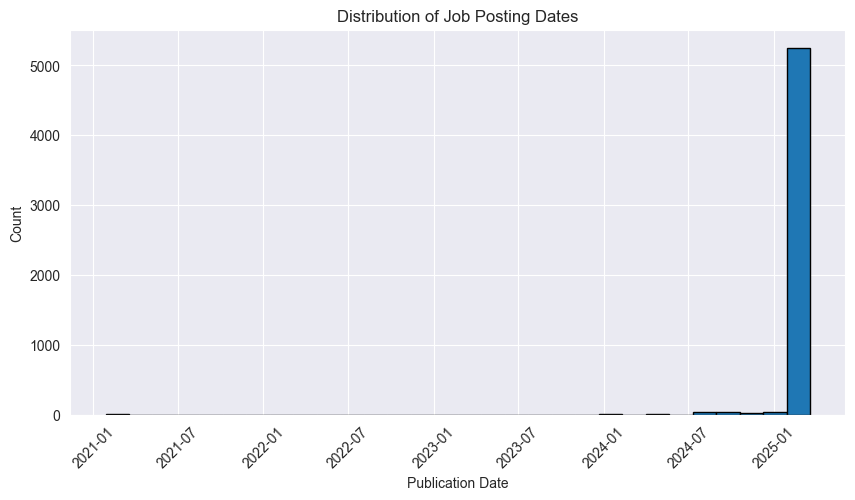

In [11]:
plt.figure(figsize=(10, 5))
df_cleaned["publication_date"].hist(bins=30, edgecolor="black")
plt.title("Distribution of Job Posting Dates")
plt.xlabel("Publication Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Almost all jobs were published recently, so to analyze change over time, we would net to scrape the information over a defined timerange in a defined interval.Some old backlogs are still saved on the page, such as jobs published in 2021 to 2024.

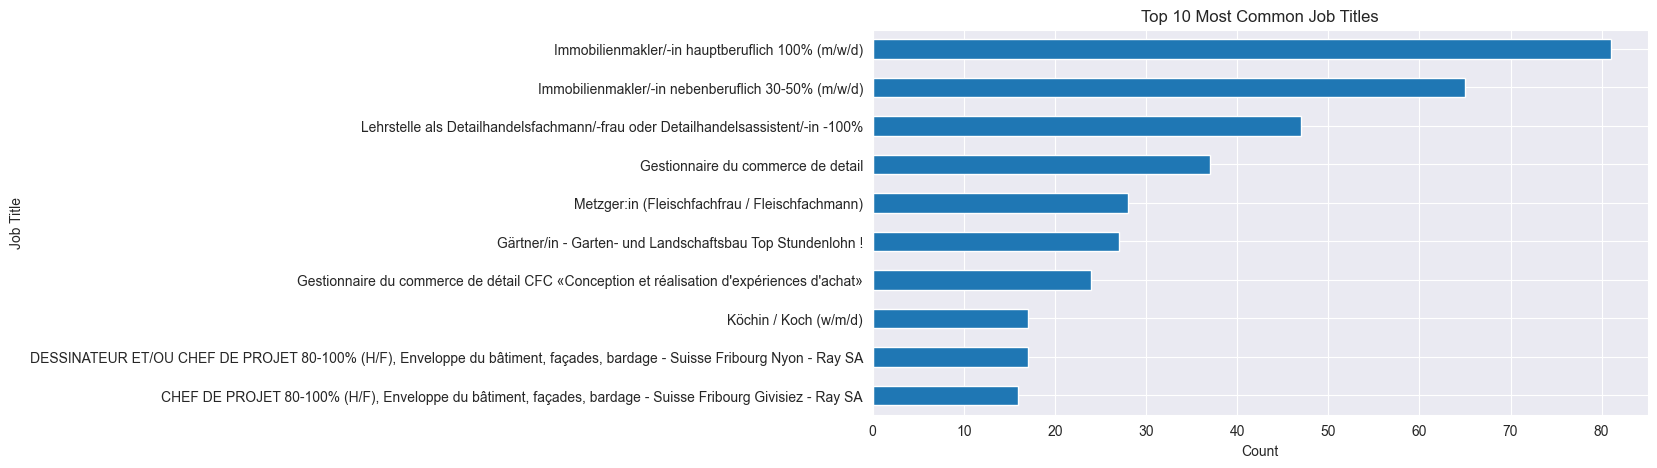

In [12]:
df_cleaned["title"].value_counts().head(10).plot(kind="barh", figsize=(10,5))
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.show()

# Depending on the scraping function, how we scrape through pages and howmany retries we have, the below statistic may differ from realistic analysis. Nevertheless, I scraped a lot of jobs in the real estate industry.


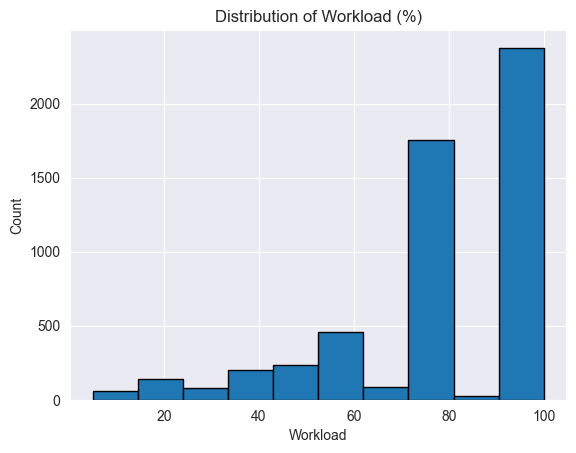

In [13]:
df_cleaned["workload"].hist(bins=10, edgecolor="black")
plt.title("Distribution of Workload (%)")
plt.xlabel("Workload")
plt.ylabel("Count")
plt.show()

# Here I tryed to show how many Jobs are posted for each workload.


## Visualizing Salary Ranges
This stacked bar chart **illustrates the salary variation per job listing**.
Still i'm not happy with the result. it is not clearly readable and would need better data for better analysis.

### Key Insights:
- **Light bars** = **Base Salary (Min)** → What the employer guarantees.
- **Dark bars** = **Additional Salary Range (Max - Min)** → Variation in salary offers.

### What to look for:
- **Wide salary ranges** → Indicate negotiable or performance-based salaries.
- **Narrow salary ranges** → Indicate fixed, structured salaries.

This helps job seekers understand **how much salary fluctuation to expect** in different roles.

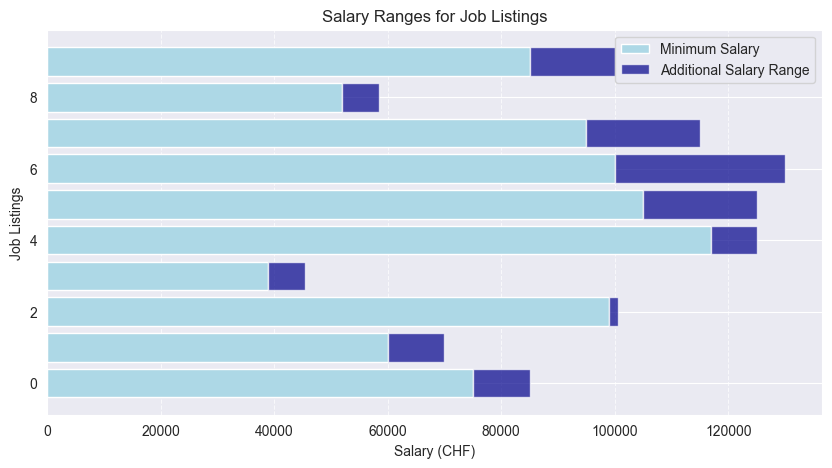

          salary_min     salary_max  salary_range
count      10.000000      10.000000     10.000000
mean    82690.000000   95450.000000  12760.000000
std     25427.126809   29787.627931   8484.521855
min     39000.000000   45500.000000   1600.000000
25%     63750.000000   73750.000000   6875.000000
50%     90000.000000  100250.000000  10000.000000
75%     99725.000000  122500.000000  18750.000000
max    117000.000000  130000.000000  30000.000000


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (Replace with your actual df_salary_filtered)
data = {
    "salary_min": [75000, 60000, 98900, 39000, 117000, 105000, 100000, 95000, 52000, 85000],
    "salary_max": [85000, 70000, 100500, 45500, 125000, 125000, 130000, 115000, 58500, 100000],
}

df_salary_filtered = pd.DataFrame(data)

# Convert salary columns to numeric (if not already)
df_salary_filtered["salary_min"] = df_salary_filtered["salary_min"].astype(float)
df_salary_filtered["salary_max"] = df_salary_filtered["salary_max"].astype(float)

# Calculate salary range
df_salary_filtered["salary_range"] = df_salary_filtered["salary_max"] - df_salary_filtered["salary_min"]

# Sort by minimum salary for better visualization
df_salary_filtered = df_salary_filtered.sort_values(by="salary_min", ascending=True)

# Create stacked bar chart
plt.figure(figsize=(10, 5))
plt.barh(df_salary_filtered.index, df_salary_filtered["salary_min"], color="lightblue", label="Minimum Salary")
plt.barh(df_salary_filtered.index, df_salary_filtered["salary_range"], left=df_salary_filtered["salary_min"], 
         color="darkblue", alpha=0.7, label="Additional Salary Range")

# Labels and title
plt.xlabel("Salary (CHF)")
plt.ylabel("Job Listings")
plt.title("Salary Ranges for Job Listings")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Print summary statistics for salary ranges
salary_range_summary = df_salary_filtered[["salary_min", "salary_max", "salary_range"]].describe()
print(salary_range_summary)
